<div align="center">
    <h1 align="center">Tugas Besar IF2220 Probabilitas dan Statistika 2023/2024</h1>
    <h3>Topik : Health</h3>
    <strong>
        <h4>Dibuat oleh: </h4>
        <h4>K01 - Kelompok 24</h4>
            <table>
              <tr>
                <td>NIM</td>
                <td>Nama</td>
              </tr>
              <tr>
                <td>13522071</td>
                <td>Bagas Sambega Rosyada</td>
              </tr>
              <tr>
                <td>13522091</td>
                <td>Raden Francisco Trianto Bratadiningrat</td>
              </tr>
            </table>
      </strong>
</div>


## Inisialisasi Dependencies Python dan Pembacaan Data

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from IPython.display import Markdown, display
import statsmodels
import math

# Read data from CSV
data = pd.read_csv("health.csv", index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2000 non-null   int64  
 1   Income                   2000 non-null   float64
 2   Gender                   2000 non-null   object 
 3   Education                2000 non-null   object 
 4   Stress_Level             2000 non-null   float64
 5   Exercise_Hours_Per_Week  2000 non-null   float64
 6   Cholesterol_Level        2000 non-null   float64
 7   Weight                   2000 non-null   float64
 8   Height                   2000 non-null   float64
 9   Blood_Pressure           2000 non-null   float64
 10  Health_Status            2000 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 187.5+ KB


# Soal General

## Nomor 1

Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data
yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi,
variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data
dalam bentuk string dapat dicari unique values, dan proporsi nya.

### Jawab: Menulis Deskripsi Statistika dari semua kolom pada data

Kolom-Kolom dibagi menjadi bentuk data numerik dan string:
- String: Gender, Education, Health_Status
- Numerik: Age, Income, Stress_level, Exercise_Hours_Per_Week, Cholesterol_Level, Weight, Height, Blood_Pressure

#### Data String

Untuk data string akan dicari:
- Unique values
- Proporsi

In [2]:
# Get columns with string type
string_columns = data.select_dtypes(include=['object']).columns

# For all colum with type string
for column in string_columns:
    stat = pd.DataFrame()
    
    # Get unique values and their counts
    unique_values = data[column].value_counts()
    
    # Calculate proportions
    proportions = unique_values*100 / len(data)

    # Construct frame
    stat["Unique Value"] = unique_values.index
    stat["Frekuensi"] = unique_values.values
    stat["Proporsi (%)"] = proportions.values
    
    # Print result
    print("Data for " + column)
    print(stat)
    print("\n")

Data for Gender
  Unique Value  Frekuensi  Proporsi (%)
0       Female       1011         50.55
1         Male        989         49.45


Data for Education
        Unique Value  Frekuensi  Proporsi (%)
0  Bachelor's Degree        940         47.00
1    Master's Degree        482         24.10
2        High School        271         13.55
3                PhD        247         12.35
4              Other         57          2.85
5          undefined          3          0.15


Data for Health_Status
  Unique Value  Frekuensi  Proporsi (%)
0         Fair        519         25.95
1         Poor        504         25.20
2    Excellent        503         25.15
3         Good        474         23.70




#### Data Numerik

Untuk data numerik akan dicari:
- mean 
- median
- modus
- standar deviasi
- variansi
- range
- minimum
- maksimum
- kuartil
- IQR
- skewness
- kurtosis

In [3]:
# Get numeric data
numerik_data = data.select_dtypes(include=['number'])

# Calculate the mode for each column
def get_mode(x: pd.DataFrame) -> pd.Series | None:
    try:
        _ = x.mode()[1]
        mode = 'multivalue'
    except KeyError:
        mode = x.mode()[0]
    return mode

# Construct dataframe
numerik_stat = pd.DataFrame()

numerik_stat["Mean"] = numerik_data.mean().round(3)
numerik_stat["Median"] = numerik_data.median().round(3)
numerik_stat["Modus"] = numerik_data.apply(get_mode)
numerik_stat["Deviasi"] = numerik_data.std().round(3)
numerik_stat["Variansi"] = numerik_data.var().round(3)
numerik_stat["Min"] = numerik_data.min().round(3)
numerik_stat["Max"] = numerik_data.max().round(3)
numerik_stat["Range"] = numerik_stat["Max"] - numerik_stat["Min"]
numerik_stat["Q1"] = numerik_data.quantile(0.25).round(3)
numerik_stat["Q2"] = numerik_data.quantile(0.5).round(3)
numerik_stat["Q3"] = numerik_data.quantile(0.75).round(3)
numerik_stat["IQR"] = (numerik_stat["Q3"] - numerik_stat["Q1"]).round(3)
numerik_stat["Skewness"] = numerik_data.skew().round(3)
numerik_stat["Kurtosis"] = numerik_data.kurtosis().round(3)

# Print result
numerik_stat

,Mean,Median,Modus,Deviasi,Variansi,Min,Max,Range,Q1,Q2,Q3,IQR,Skewness,Kurtosis
Age,39.418,39.000,53,11.561,1.336510e+02,20.000,5.900000e+01,3.900000e+01,30.000,39.000,49.250,19.250,-0.005,-1.203
Income,4889928.319,4898900.675,multivalue,2010795.025,4.043297e+12,-1088986.526,1.222749e+07,1.331648e+07,3580713.611,4898900.675,6271595.199,2690881.588,-0.006,-0.032
Stress_Level,5.357,5.352,multivalue,0.917,8.410000e-01,2.528,8.581000e+00,6.053000e+00,4.738,5.352,6.003,1.265,-0.013,-0.130
Exercise_Hours_Per_Week,9.952,9.927,multivalue,4.910,2.410400e+01,-4.499,2.681600e+01,3.131500e+01,6.655,9.927,13.232,6.577,0.061,0.018
Cholesterol_Level,200.223,200.222,multivalue,0.973,9.460000e-01,196.915,2.031620e+02,6.247000e+00,199.582,200.222,200.874,1.292,-0.072,0.006
Weight,70.234,70.392,multivalue,10.174,1.035170e+02,32.582,1.096100e+02,7.702800e+01,63.655,70.392,76.895,13.240,-0.058,0.125
Height,150.731,150.664,multivalue,0.680,4.630000e-01,149.125,1.538700e+02,4.745000e+00,150.240,150.664,151.140,0.900,0.657,0.708
Blood_Pressure,119.682,119.937,0.0,11.201,1.254720e+02,0.000,2.009500e+02,2.009500e+02,113.049,119.937,126.609,13.560,-1.627,18.838


## Nomor 2

Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya?
Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

### Jawab

Outlier adalah data yang memiliki nilai jauh dari kumpulan data-data lainnya yang terjadi misalkan karena kegagalan pengukuran, salah masukan, dll.

Berdasarkan proses untuk mengatasi dan menghapus data outlier, kami menemukan data memiliki outlier. Hal ini dapat terlihat karena jumlah data pada hasil proses penghapusan outlier, jumlah data mengurang. Namun hal tersebut juga menunjukkan bahwa kami dapat menangani data-data outlier dengan melakukan penghapusa data outlier sebelum digunakan untuk analisis yang lebih lanjut.

#### Langkah Mengatasi Outlier
#### 1. Menghilangkan data  kosong seperti null dan undefined

Data yang kosong atau null, akan menggangu serta merusak analis. data dengan nilai kosong akan dihapus.



In [16]:
# get initial size
original_size = data.shape[0]

# 1. Remove Null or Undefinded Values 
no_null_data = data.dropna()
no_null_data = no_null_data[no_null_data['Education'] != 'undefined']

# get new size
no_null_size = no_null_data.shape[0]

display(Markdown("### data removed = %d" % (original_size - no_null_size))) 
    

### data removed = 3

#### 2. Menghilangkan data yang tidak masuk akal

Batas-batas yang digunakan:

- Age: Harus Positif
- Stress_Level: Boleh
- Exercise_Hours_Per_Week: Tidak boleh negatif
- Cholesterol_Level: Harus Positif
- Blood_Pressure: Tidak boleh 0, jika 0 maka orang tersebut mati
- Income: Tidak boleh negatif


In [53]:
# 2. Remove non logical data
result_data = no_null_data.copy()
result_data = result_data[result_data['Age'] > 0]
result_data = result_data[result_data['Stress_Level'] >= 0]
result_data = result_data[result_data['Exercise_Hours_Per_Week'] >= 0]
result_data = result_data[result_data['Cholesterol_Level'] > 0]
result_data = result_data[result_data['Blood_Pressure'] > 0]
result_data = result_data[result_data['Income'] > 0]

# get new size
logical_size = result_data.shape[0]

display(Markdown("### data removed = %d" % (no_null_size - logical_size)))
display(Markdown("### current size = %d" % logical_size))

### data removed = 60

### current size = 1937

#### 3. Menggunakan Interquartile Range (IQR) untuk Mengatasi Outlier

Metode Interquartile Range (IQR) merupakan salah satu pendekatan yang efektif untuk mengilangkan data-data outlier. IQR mengukur sebaran tengah dari data dengan menghitung rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3). Data yang berada di luar rentang ini akan dianggap sebagai outlier dan dihapus.

In [55]:
# 3. using z score to remove outliers
numeric_columns = data.select_dtypes(include=['number']).columns

# For each numeric column, calculate Q1, Q3, IQR, and remove outliers
for column in numeric_columns:
    Q1 = result_data[column].quantile(0.25)
    Q3 = result_data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers and remove them
    outliers = (result_data[column] < (Q1 - 1.5 * IQR)) | (result_data[column] > (Q3 + 1.5 * IQR))
    result_data = result_data[~outliers]

# Reset data frame index
result_data.reset_index(drop=True, inplace=True)

# get new size
no_outlier_size = result_data.shape[0]




#### 4. Menggunakan Nilai Z pada Standar Deviasi

Nilai z dari suatu data akan menunjukan seberapa jauh suatu data dengan data lainnya. Secara umum digunakan batas nilai z = 3 sebagai batas apakah suatu data terlalu jauh dari kumpulan data. Dengan menghitung nilai z dari semua kolom yang bertipe numerik, serta menghilangkan data yang memiliki salah satu kolomnya dengan nilai z mutlak lebih besar dari 3, maka kami berhasil mengatasi data-data outlier.

In [56]:
numeric_columns = data.select_dtypes(include=['number']).columns

# Calculate the z-score for each student's height
for column in numeric_columns:
    z = np.abs(stats.zscore(result_data[column]))
    
    # Identify outliers ass students with a z-score greater than 3
    threshold = 3
    outliers = result_data[z > threshold]

    result_data = result_data.drop(outliers.index)

# Reset data frame index
result_data.reset_index(drop=True, inplace=True)

display(Markdown("#### data removed = %d" % (logical_size - no_outlier_size)))
display(Markdown("<br>"))

total_removed = original_size - no_outlier_size

display(Markdown("## Resulting data without outliers: "))
display(Markdown("### total data removed = %d" % total_removed))
display(Markdown("#### outlier percentage = %d%%" % (total_removed/original_size*100)))
display(Markdown("#### new size = %d" % no_outlier_size))

result_data

#### data removed = 129

<br>

## Resulting data without outliers: 

### total data removed = 192

#### outlier percentage = 9%

#### new size = 1808

,Age,Income,Gender,Education,Stress_Level,Exercise_Hours_Per_Week,Cholesterol_Level,Weight,Height,Blood_Pressure,Health_Status
0,50,3.093457e+06,Male,Bachelor's Degree,4.967887,16.632494,200.419036,70.917032,150.401537,125.568820,Excellent
1,44,5.545445e+06,Male,Bachelor's Degree,5.833649,13.255988,201.010046,70.669576,149.285349,125.603505,Fair
2,25,4.401808e+06,Male,Master's Degree,5.587946,11.144370,200.105258,67.464506,150.020695,127.093163,Excellent
3,41,4.606865e+06,Female,High School,6.271119,9.140268,199.648701,67.566598,150.360963,117.388100,Poor
4,24,6.956049e+06,Male,Bachelor's Degree,5.895226,9.775610,199.330152,79.601530,149.730525,114.163706,Fair
...,...,...,...,...,...,...,...,...,...,...,...
1803,22,2.072546e+06,Male,Master's Degree,5.356903,14.428793,200.696341,49.569958,150.114380,113.658773,Fair
1804,25,7.456909e+06,Female,Master's Degree,5.499054,5.349180,198.991264,73.592521,149.828511,107.860829,Excellent
1805,44,5.560391e+06,Male,PhD,7.034253,3.746812,200.576659,44.493272,150.587193,138.210854,Poor
1806,20,3.436759e+06,Male,Bachelor's Degree,5.690408,5.720289,200.206448,85.255918,150.825614,127.516222,Good


## Nomor 3

Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom
berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan
box plot, dan jika string dengan histogram.

In [57]:
data_column_numeric = result_data.select_dtypes(include=['number']).columns
data_column_string = result_data.select_dtypes(exclude=['number']).columns

# Box plot settings
plt.rcParams['boxplot.boxprops.linewidth'] = 2
plt.rcParams['boxplot.whiskerprops.linewidth'] = 2
plt.rcParams['boxplot.capprops.linewidth'] = 2
plt.rcParams['boxplot.medianprops.linewidth'] = 2
plt.rcParams['boxplot.flierprops.marker'] = 'o'
plt.rcParams['boxplot.flierprops.markersize'] = 8
plt.rcParams['boxplot.flierprops.linewidth'] = 2
plt.rcParams['boxplot.flierprops.markeredgecolor'] = 'mediumorchid'

def distribution_plot_numeric(column_name: str, bar_label: bool = False, bin_count: int = 20) -> None:
    """
    Create a distribution plot for numeric type
    """

    # Create Plot
    fig_hist, ax_hist = plt.subplots(figsize=(8, 4))
    fig_box, ax_box = plt.subplots(figsize=(8, 3))

    # Plot the histogram
    column_data = result_data[column_name] 
    ax_hist.set_title(f"Distribusi data {column_name}", fontsize=16)
    ax_hist.set_xlabel(column_name, fontsize=14)
    ax_hist.set_ylabel("Frekuensi", fontsize=14)
    hist, bins, _ = ax_hist.hist(column_data, bins=bin_count, color='mediumorchid', edgecolor='black', alpha=0.7, rwidth=0.7)
    ax_hist.grid(True, linestyle='--', alpha=0.5)
    ax_hist.tick_params(axis='both', which='major', labelsize=12)
    
    # Add text label to each bar
    if bar_label :
        bin_centers = 0.5 * (bins[:-1] + bins[1:])
        for count, (x, y) in enumerate(zip(bin_centers, hist)):
            ax_hist.text(x, y, f'{int(bins[count]):,} - {int(bins[count+1]):,}', ha='center', va='bottom', fontsize=10)

    # Plot the box plot
    ax_box.set_title(f"Distribusi data {column_name}", fontsize=16)
    ax_box.boxplot(column_data, vert=False)
    ax_box.set_xlabel(column_name, fontsize=14)
    ax_box.set_ylabel("Box Plot", fontsize=14)
    ax_box.boxplot(column_data, vert=False, patch_artist=True, boxprops=dict(facecolor='mediumorchid'))
    ax_box.grid(True, linestyle='--', alpha=0.5)
    ax_box.tick_params(axis='both', which='major', labelsize=12)

    plt.tight_layout()
    plt.show()

def distribution_plot_string(column_name: str) -> None:
    """
    Create a distribution plot for string type
    """

    # Extract column data
    column_data = result_data[column_name]

    # Count the frequency of each category
    category_counts = column_data.value_counts()

    # Create plot
    plt.figure(figsize=(8, 4))
    plt.bar(category_counts.index, category_counts.values, color='mediumorchid', alpha=0.7)
    plt.title(f"Distribusi data {column_name}", fontsize=16)
    plt.ylabel("Frekuensi", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Show new data without outliers
numerik_stat = pd.DataFrame()
numerik_data = result_data.select_dtypes(include=['number'])
numerik_stat["Mean"] = numerik_data.mean().round(3)
numerik_stat["Median"] = numerik_data.median().round(3)
numerik_stat["Modus"] = numerik_data.apply(get_mode)
numerik_stat["Deviasi"] = numerik_data.std().round(3)
numerik_stat["Variansi"] = numerik_data.var().round(3)
numerik_stat["Min"] = numerik_data.min().round(3)
numerik_stat["Max"] = numerik_data.max().round(3)
numerik_stat["Range"] = numerik_stat["Max"] - numerik_stat["Min"]
numerik_stat["Q1"] = numerik_data.quantile(0.25).round(3)
numerik_stat["Q2"] = numerik_data.quantile(0.5).round(3)
numerik_stat["Q3"] = numerik_data.quantile(0.75).round(3)
numerik_stat["IQR"] = (numerik_stat["Q3"] - numerik_stat["Q1"]).round(3)
numerik_stat["Skewness"] = numerik_data.skew().round(3)
numerik_stat["Kurtosis"] = numerik_data.kurtosis().round(3)

# Print result
numerik_stat

,Mean,Median,Modus,Deviasi,Variansi,Min,Max,Range,Q1,Q2,Q3,IQR,Skewness,Kurtosis
Age,39.449,39.000,20,11.538,1.331290e+02,20.000,5.900000e+01,3.900000e+01,30.000,39.000,49.000,19.000,-0.012,-1.194
Income,4899330.724,4877759.957,multivalue,1921210.753,3.691051e+12,755.409,1.019162e+07,1.019087e+07,3611270.708,4877759.957,6257340.669,2646069.961,0.023,-0.308
Stress_Level,5.358,5.355,multivalue,0.892,7.960000e-01,2.874,7.873000e+00,4.999000e+00,4.748,5.355,5.987,1.239,-0.019,-0.344
Exercise_Hours_Per_Week,10.105,9.981,multivalue,4.560,2.079500e+01,0.023,2.277300e+01,2.275000e+01,6.890,9.981,13.253,6.363,0.154,-0.409
Cholesterol_Level,200.229,200.226,multivalue,0.942,8.870000e-01,197.665,2.027280e+02,5.063000e+00,199.587,200.226,200.877,1.290,-0.013,-0.295
Weight,70.143,70.317,multivalue,9.661,9.333200e+01,44.091,9.575200e+01,5.166100e+01,63.684,70.317,76.664,12.980,-0.076,-0.346
Height,150.692,150.645,multivalue,0.625,3.910000e-01,149.125,1.524210e+02,3.296000e+00,150.232,150.645,151.105,0.873,0.319,-0.313
Blood_Pressure,119.973,120.132,multivalue,9.566,9.150900e+01,94.327,1.456150e+02,5.128800e+01,113.292,120.132,126.609,13.317,-0.035,-0.348


In [58]:
# Get columns with string type
string_columns = result_data.select_dtypes(include=['object']).columns

# For all colum with type string
for column in string_columns:
    stat = pd.DataFrame()

    # Get unique values and their counts
    unique_values = result_data[column].value_counts()

    # Calculate proportions
    proportions = unique_values*100 / len(result_data)

    # Construct frame
    stat["Unique Value"] = unique_values.index
    stat["Frekuensi"] = unique_values.values
    stat["Proporsi (%)"] = proportions.values

    # Print result
    print("Data for " + column)
    print(stat)
    print("\n")

Data for Gender
  Unique Value  Frekuensi  Proporsi (%)
0       Female        911     50.387168
1         Male        897     49.612832


Data for Education
        Unique Value  Frekuensi  Proporsi (%)
0  Bachelor's Degree        841     46.515487
1    Master's Degree        445     24.612832
2        High School        246     13.606195
3                PhD        229     12.665929
4              Other         47      2.599558


Data for Health_Status
  Unique Value  Frekuensi  Proporsi (%)
0         Fair        470     25.995575
1         Poor        460     25.442478
2    Excellent        456     25.221239
3         Good        422     23.340708




#### Data Age

Kolom Age memiliki data umur berupa bilangan bulat yang dibagi menjadi 20 bagian dengan lebar yang sama. Kolom Age memiliki range 39, dengan nilai minimum 20 dan maksismum 59.

Hasil histogram, menunjukan distribusi Age yang cukup rata (uniform) dengan frekuensi tertingi berada pada range umur 20-21 dan terkecil pada range umur 39-41.

Hasil box plot, menunjukan adanya negatif skewness(-0.012). Hal ini disebabkan posisi nilai median(39) yang lebih dekat dengan nilai Kuartil Q1(30) dibandingkan dengan nilai Kuartil Q3(49).

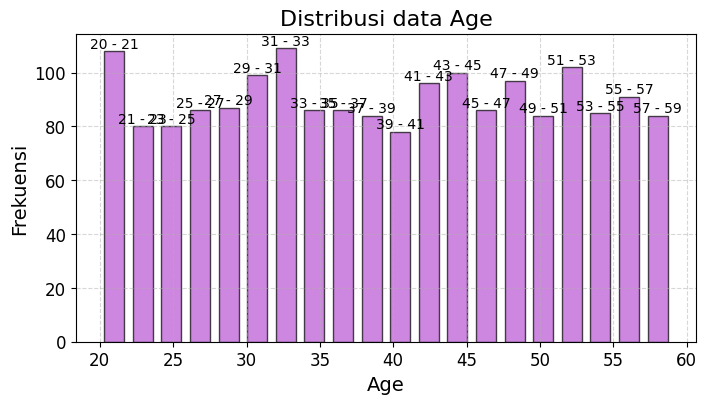

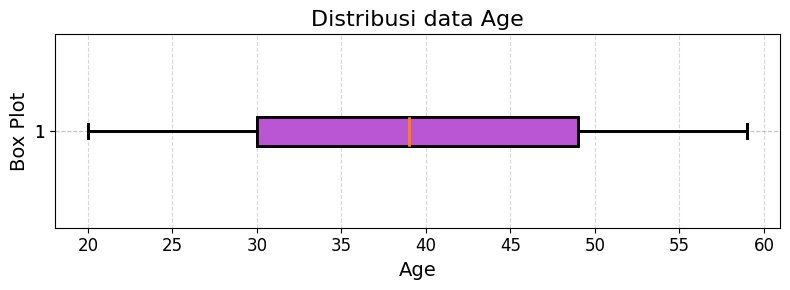

In [59]:
distribution_plot_numeric(data_column_numeric[0], bar_label=True)

#### Data Income

Kolom Income memiliki data penghasilan yang berupa bilangan real yang dibagi menjadi 20 bagian dengan lebar yang sama. Kolom Income memiliki nilai minimum 755.409 dan nilai maksismum 10.256.589.

Hasil histogram, menunjukan distribusi Income yang simetris dengan frekuensi tertingi berada pada range penghasilan 4.615.880 - 5.128.672 dan terkecil pada range penghasilan 9.743.798 hingga 10.256.589.

Hasil box plot, menunjukan adanya positif skewness (0.028). Hal ini disebabkan posisi nilai median(4.904.525,748) yang lebih dekat dengan nilai Kuartil Q3(6.265.044,813) dibandingkan dengan nilai Kuartil Q1(3.612.627,851). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

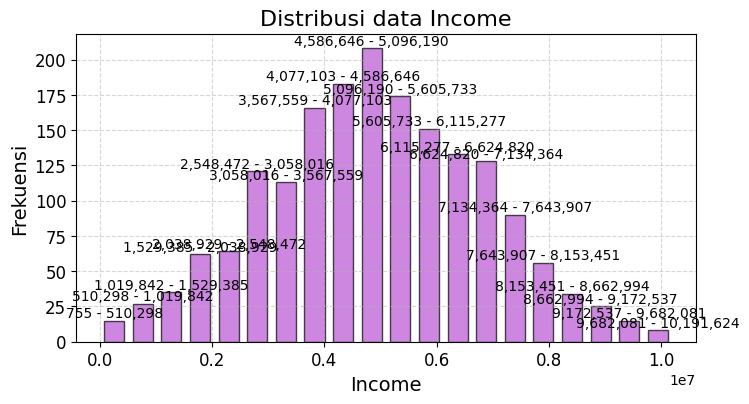

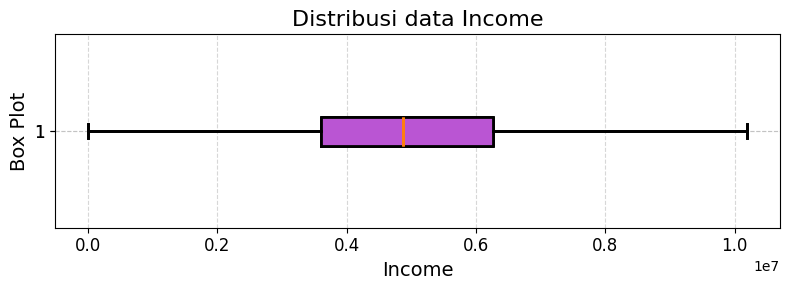

In [60]:
distribution_plot_numeric(data_column_numeric[1], True)

#### Data Stress_Level

Kolom Stress_Level memiliki data tingkat stress yang berupa bilangan real yang dibagi menjadi 10 bagian dengan lebar yang sama. Kolom Stress_Level memiliki range 4.999 dengan nilai minimum 2.874 dan nilai maksismum 7,873.

Hasil histogram, menunjukan distribusi Stress_Level yang simetris dengan frekuensi tertingi berada pada range 4 - 5 (desimal tidak terlihat) .

Hasil box plot, menunjukan adanya negatif skewness (-0,024). Hal ini disebabkan posisi nilai median(5,358) yang lebih dekat dengan nilai Kuartil Q1(4,747) dibandingkan dengan nilai Kuartil Q3(5,997). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

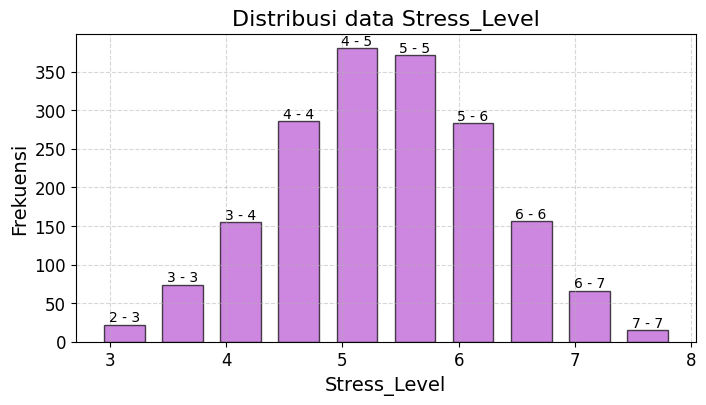

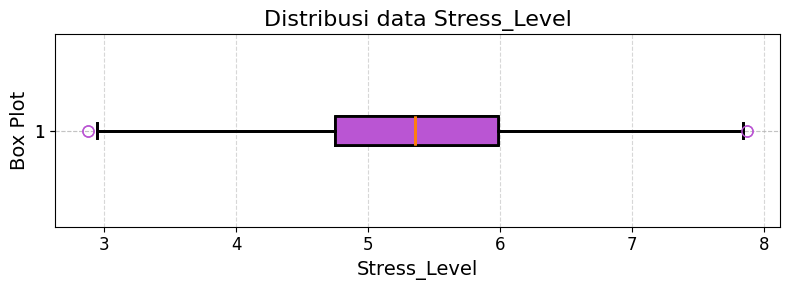

In [61]:
distribution_plot_numeric(data_column_numeric[2], True, bin_count=10)

#### Data Exercise_Hours_Per_Week

Kolom Exercise_Hours_Per_Week merupakan data jumlah waktu olahraga dalam jam per minggu yang berupa bilangan real yang dibagi menjadi 24 bagian dengan lebar yang sama. Kolom Exercise_Hours_Per_Week memiliki range 22,543 dengan nilai minimum 0,023 dan nilai maksismum 22,773.

Hasil histogram, menunjukan distribusi Exercise_Hours_Per_Week yang mengalami skewnes dengan frekuensi tertingi berada pada range 9-10 jam per minggu dan terkecil pada range 21-22 jam per minggu.

Hasil box plot, menunjukan adanya positif skewness (0,155). Hal ini disebabkan posisi nilai median(9,981) yang lebih dekat dengan nilai Kuartil Q3(13,250) dibandingkan dengan nilai Kuartil Q1(6,901). 

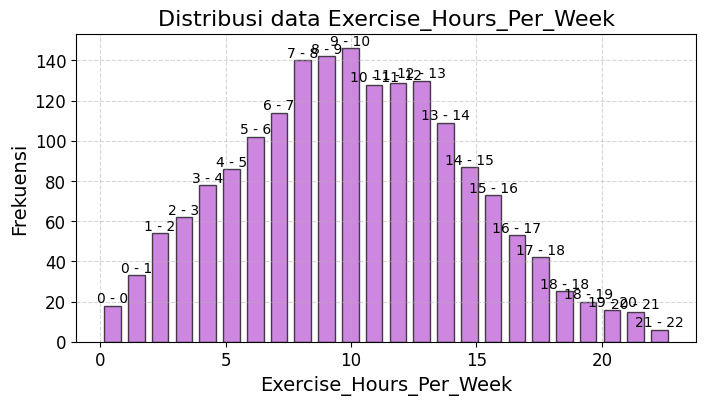

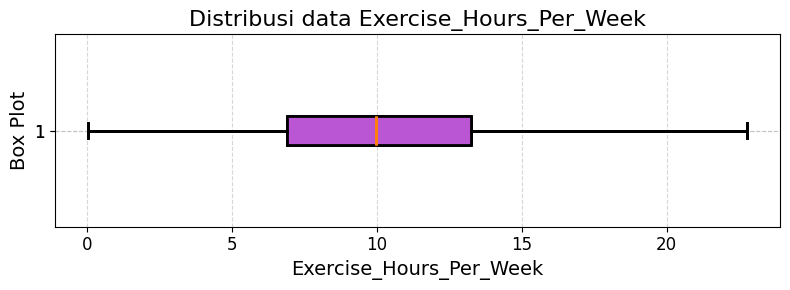

In [62]:
distribution_plot_numeric(data_column_numeric[3], bin_count=24, bar_label=True)

#### Data Cholesterol_Level

Kolom Cholesterol_Level merupakan data tingkat kolesterol yang berupa bilangan real yang dibagi menjadi 10 bagian dengan lebar yang sama. Kolom Cholesterol_Level memiliki range 5,169 dengan nilai minimum 197,665 dan nilai maksismum 202,834.

Hasil histogram, menunjukan distribusi Cholesterol_Level yang simetris dengan frekuensi tertingi berada pada range 199-200(desimal tidak terlihat) dan terkecil pada range 202-202(desimal tidak terlihat).

Hasil box plot, menunjukan sedikitnya skewness (0,001). Hal ini disebabkan posisi nilai median(200,224) yang terhadap nilai Kuartil Q1(199,577) dibandingkan dengan nilai Kuartil Q3(200,877) yang hampir sama. Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

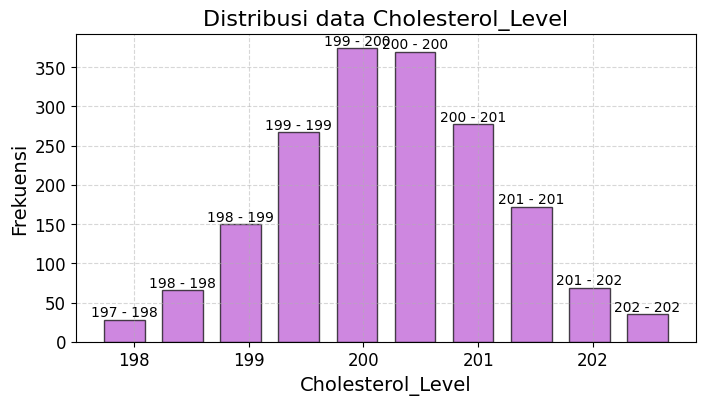

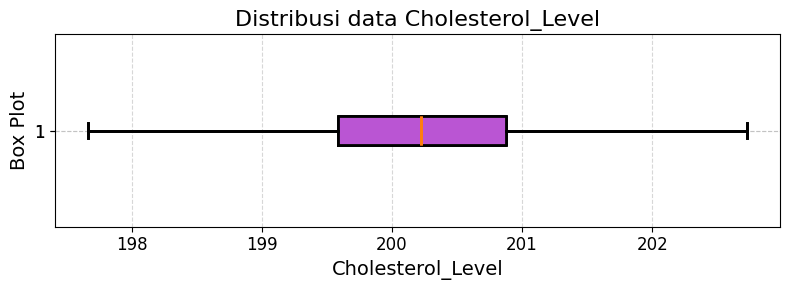

In [63]:
distribution_plot_numeric(data_column_numeric[4], True, bin_count=10)

#### Data Weight

Kolom Weight merupakan data berat badan yang berupa bilangan real yang dibagi menjadi 20 bagian dengan lebar yang sama. Kolom Weight memiliki range 52,408 dengan nilai minimum 43,974 dan nilai maksismum 96,382.

Hasil histogram, menunjukan distribusi Weight yang simetris dengan frekuensi tertingi berada pada range 72-75 dan terkecil pada range 93-96.

Hasil box plot, menunjukan adanya negatif skewness (-0,071). Hal ini disebabkan posisi nilai median(70,317) yang lebih dekat dengan nilai Kuartil Q1(63,634) dibandingkan dengan nilai Kuartil Q3(76,708). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

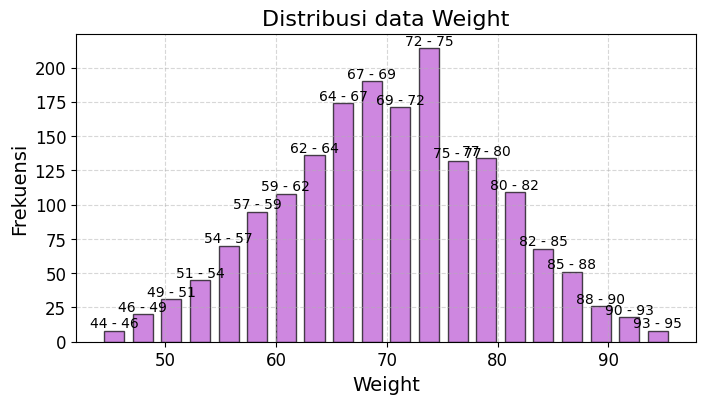

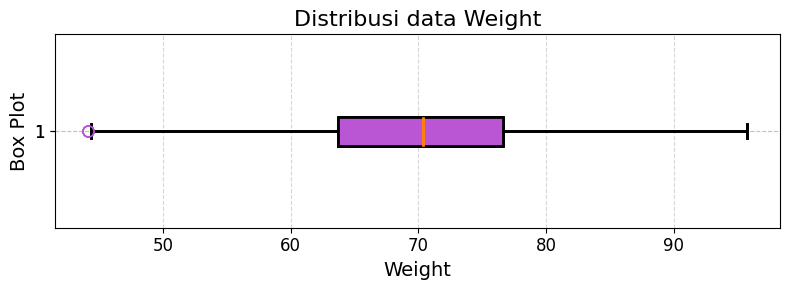

In [64]:
distribution_plot_numeric(data_column_numeric[5], True)

#### Data Height

Kolom Height merupakan data tinggi badan yang berupa bilangan real yang dibagi menjadi 16 bagian dengan lebar yang sama. Kolom Height memiliki range 3,357 dengan nilai minimum 149.125 dan nilai maksismum 152,482.

Hasil histogram, menunjukan distribusi Height yang mengalami skewness positif dengan frekuensi tertingi berada pada range 159-150 (Desimal tidak terlihat) dan terkecil pada range 149-149 (Desimal tidak terlihat).

Hasil box plot, menunjukan adanya positif skewness (0,347). Hal ini disebabkan posisi nilai median(150,657) yang lebih dekat dengan nilai Kuartil Q3(151,114) dibandingkan dengan nilai Kuartil Q1(150,236). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

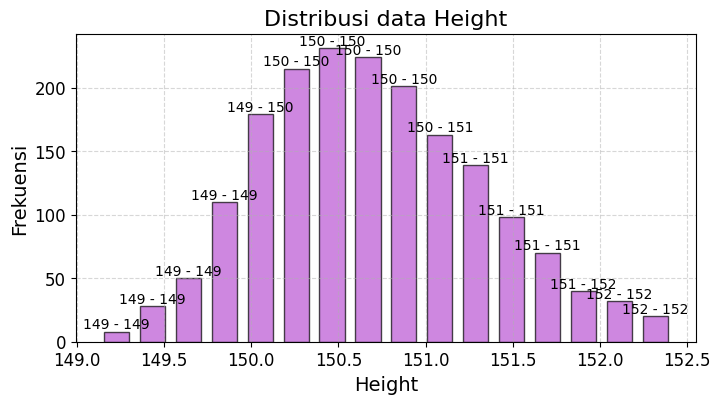

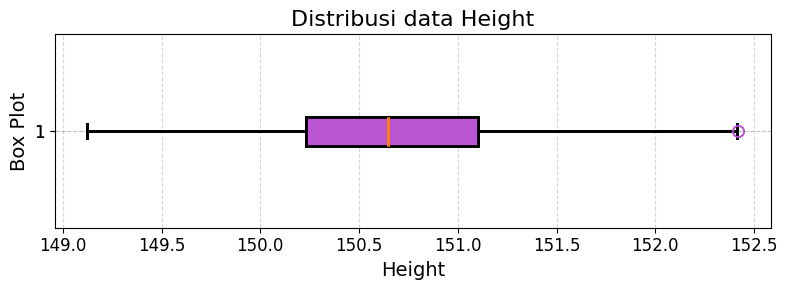

In [65]:
distribution_plot_numeric(data_column_numeric[6], bin_count=16, bar_label=True)

#### Data Blood_Pressure

Kolom Blood_Pressure merupakan data ukuran tekanan darah yang dibagi menjadi 20 bagian dengan lebar yang sama. Kolom Blood_Pressure memiliki range 53,828 dengan nilai minimum 93,055 dan nilai maksismum 146,883.

Hasil histogram, menunjukan distribusi Blood_Pressure yang mengalami skewness positif dengan frekuensi tertingi berada pada range 1179-119 dan terkecil pada range 93-95.

Hasil box plot, menunjukan adanya negatif skewness (-0,034). Hal ini disebabkan posisi nilai median(120,113) yang lebih dekat dengan nilai Kuartil Q1(113,246) dibandingkan dengan nilai Kuartil Q3(126,614). Terlihat juga terdapat nilai-nilai yang berada di luar range antara kuartil pertama dan ketiga.

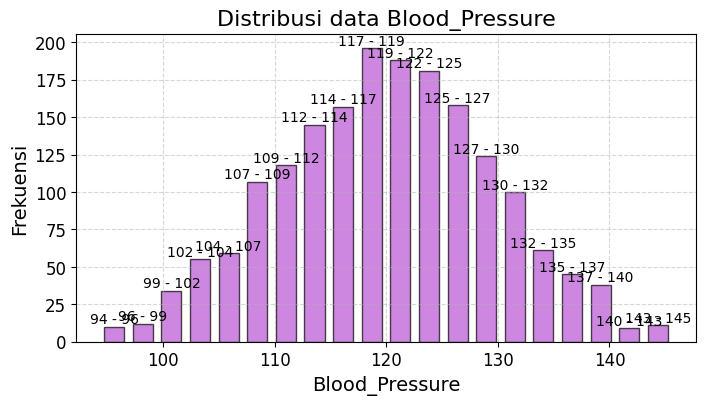

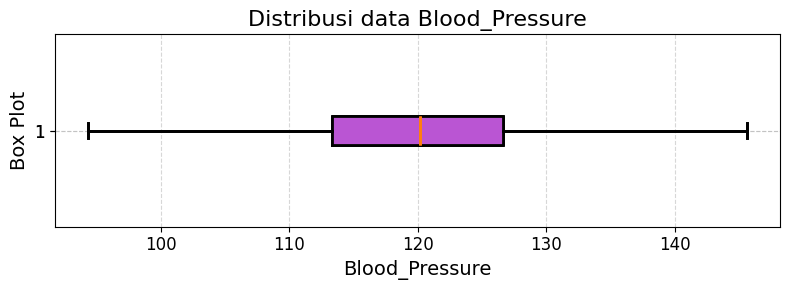

In [66]:
distribution_plot_numeric(data_column_numeric[7], True)

#### Data Gender

Kolom Gender merupakan data kelamin yang terbagi menjadi 2, yaitu Male dan Female

Distribusi data kolom Gender adalah rata(uniform). Hal tersebut dikarenakan proporsi Female bernilai 50,575% dan Male bernilai 49,425%. 

|  Unique Value  | Frekuensi | Proporsi (%) |
|:--------------:|:---------:|:------------:|
|     Female     |    968    |  50.384193   |
|      Male      |    946    |  49.615807   |

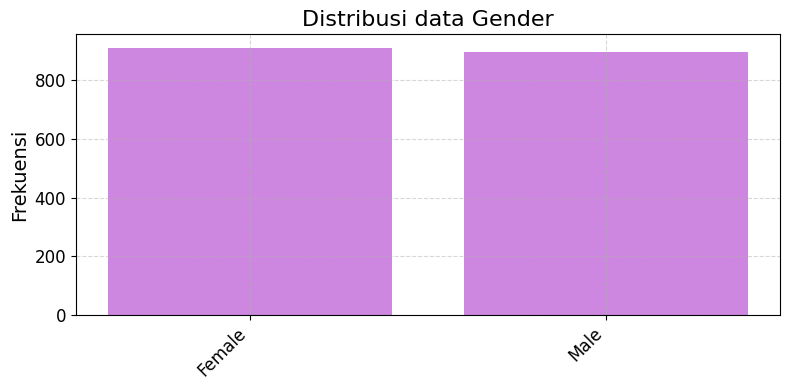

In [67]:
distribution_plot_string(data_column_string[0])

#### Data Education

Kolom Education merupakan data tingkat edukasi yang terbagi menjadi 5, yaitu Banchelor's Degree, Master's Degree, High School, Phd dan Other

Distribusi data kolom Education adalah tidak rata dengan 46,76% adalah Banchelor's Degree

|   Unique Value    | Frekuensi | Proporsi (%) |
|:-----------------:|:---------:|:------------:|
| Bachelor's Degree |    895    |  46.432492   |
|  Master's Degree  |    469    |  24.643249   |
|    High School    |    258    |  13.556531   |
|        PhD        |    240    |  12.678375   |
|       Other       |    52     |   2.689352   |

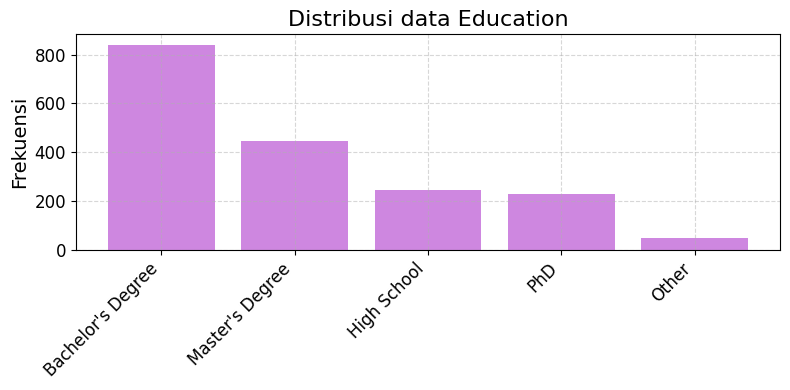

In [68]:
distribution_plot_string(data_column_string[1])

#### Data Health_Status

Kolom Health_Status merupakan data status kesehatan yang terbagi menjadi 4, yaitu Fair, Poor, Excellent, dan Good

Distribusi data kolom Health_Status adalah rata(uniform) dengan rata-rata proporsi adalah 24,986% atau dibulatkan menjadi 25%

|   Unique Value   |  Frekuensi  | Proporsi (%) |
|:----------------:|:-----------:|:------------:|
|       Fair       |     498     |  25.960483   |
|       Poor       |     486     |  25.411636   |
|    Excellent     |     481     |  25.301866   |
|       Good       |     449     |  23.326015   |

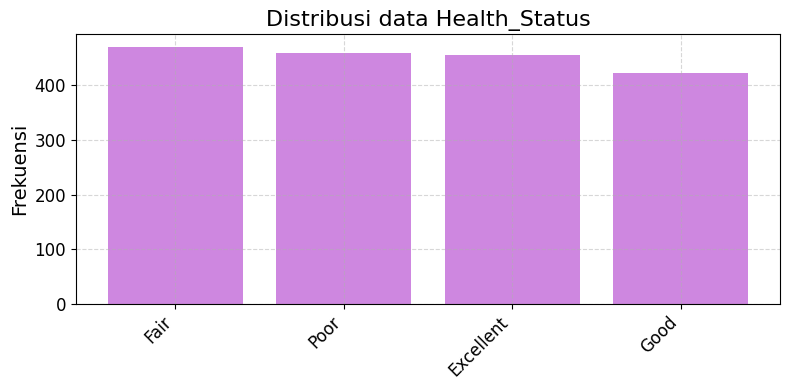

In [69]:
distribution_plot_string(data_column_string[2])

## Nomor 4

Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram.
Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

### Jawab

Untuk menentukan jenis dari distribusi kami melakukan test-test berikut:
- D’Agostino’s K-squared Test -> distribusi normal
- Kolmogorov-Smirnov Test -> distribusi uniform
- Chi-Square Test -> distribusi poisson

Tidak semua test untuk semua jenis distribusi digunakan. Namun dengan menggunakan test-test tersebut, sudah cukup untuk menentukan semua distribusi dari data numerik.

In [129]:
def get_chi_square_p(column_values):
    """
    Calculates the p-value of the Chi-squared test for a given column's distribution.
    
    Parameters:
        column_values (Series): The pandas Series containing the data.
        
    Returns:
        float: The p-value of the Chi-squared test.
    """
    # Fit a Poisson distribution to the data
    mu = column_values.mean()
    expected_counts = np.array([stats.poisson.pmf(i, mu) * len(column_values) for i in range(int(column_values.min()), int(column_values.max()) + 1)])

    # Calculate observed frequencies
    observed_counts, _ = np.histogram(column_values, bins=len(expected_counts), range=(int(column_values.min()), int(column_values.max()) + 1))
    # print(expected_counts)
    # print(observed_counts)

    # Perform the chi-squared test
    try:
        _, p_value = stats.chisquare(observed_counts, expected_counts)
        return p_value
    except:
        return 0
    # _, p_value = stats.chisquare(observed_counts, np.sum(observed_counts)/np.sum(expected_counts) * expected_counts)


def test_distribution(column_name: str) -> None:
    # Check if the data contain string or non-calculated data
    if result_data[column_name].dtype == 'object' :
        display(Markdown("#### Kolom %s Memiliki Tipe Data String" % column_name))
        display(Markdown("#### Sehingga tidak berdistribusi"))
        return

    column_values = result_data[column_name]
    
    # D’Agostino’s K-squared Test
    # Checks if the distribution is normal distribution
    stat_normal, p_normal = stats.normaltest(column_values, nan_policy='omit')
    print(f"Nilai p-Value: {p_normal}\n")
    print(f"Nilai skewness: {result_data[column_name].skew()}")
    print(f"Nilai kurt: {result_data[column_name].kurt()}")

    if p_normal >= 0.05:
        # Normal distribution
        
        # Display p value and conclusion
        display(Markdown("#### D’Agostino’s K-squared Test"))
        display(Markdown("#### nilai $p-normal$ = $%.20f$" % p_normal))
        display(Markdown("#### Kolom %s Berdistribusi Normal" % column_name))
        
    else:
        # Non-normal distribution

        # Kolmogorov-Smirnov Test
        # Checks if the distribution is uniform distribution
        stat_uniform, p_uniform = stats.kstest(column_values, 'uniform')
        
        if p_uniform > 0.05:
            # Distribution is similar to uniform distribution
            display(Markdown("#### Kolmogorov-Smirnov Test"))
            display(Markdown("#### nilai $p-uniform$ = $%.20f$" % p_uniform))
            display(Markdown("#### Kolom %s Mirip Dengan Distribusi Uniform" % column_name))
            
        else:
            # Non-normal distribution
            # Non-uniform distribution
            
            # Chi-Squared Test 
            # Checks if the distribution is poisson distribution     
            if get_chi_square_p(column_values) >= 0.5:
                display(Markdown("#### Kolom %s Mirip Dengan Distribusi Uniform" % column_name))

    plt.figure(figsize=(8, 4))
    column_values.plot(kind="hist", color="mediumorchid", linewidth=1.9, edgecolor="#550d52", bins=40, density="True", rwidth=0.7)
    column_values.plot(kind="kde", color="#22ff22", linewidth=3, figsize=(10, 6))
    plt.title(column_name)
    plt.show()

#### Jenis distribusi tidak dapat ditentukan

Nilai p-Value: 1.8654033173711584e-298

Nilai skewness: -0.012017535959935178
Nilai kurt: -1.1943486239928618
Kolom Age tidak terdistribusi normal, uniform, maupun poisson


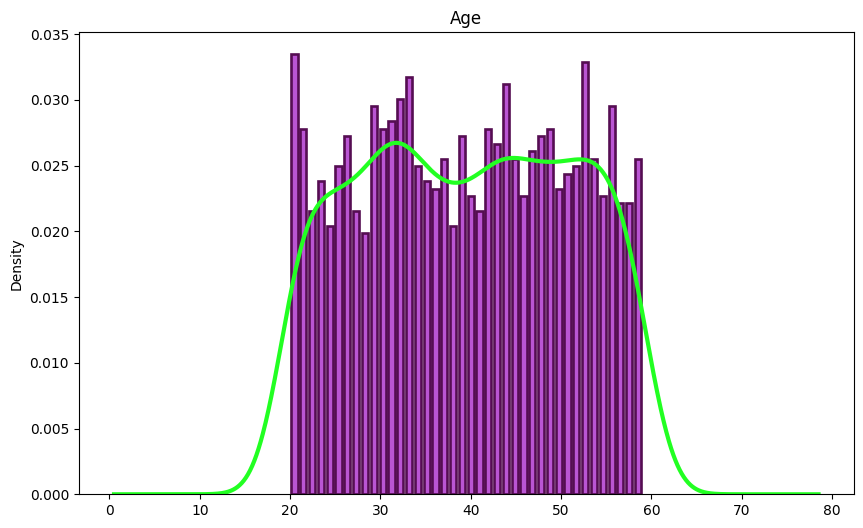

In [132]:
display(Markdown("#### Jenis distribusi tidak dapat ditentukan"))
test_distribution(data_column_numeric[0])

Nilai p-Value: 0.006833655717570883

Nilai skewness: 0.023230885517401142
Nilai kurt: -0.3080337226655274


C:\Users\Hackastic\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:8022: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
C:\Users\Hackastic\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:8022: RuntimeWarning: overflow encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
C:\Users\Hackastic\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:8022: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


#### Kolom Income tidak terdistribusi normal, uniform, maupun poisson

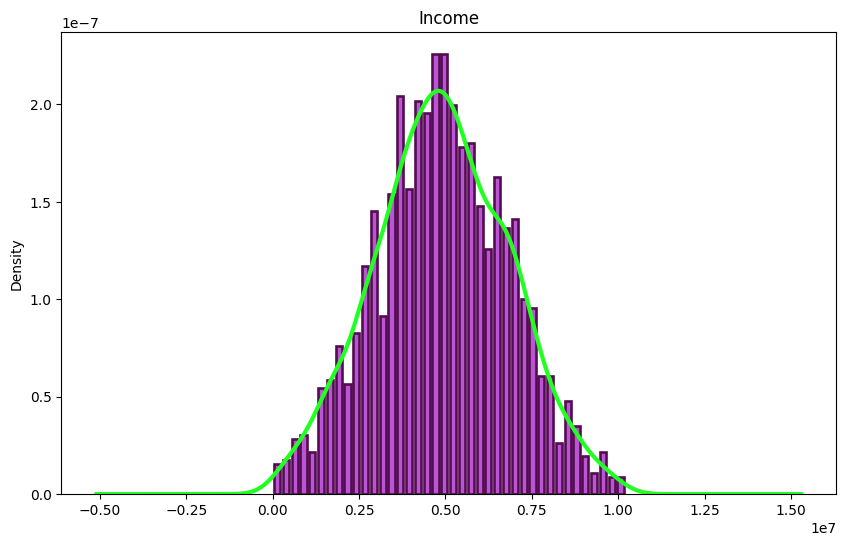

In [72]:
test_distribution(data_column_numeric[1])

### Distribusi Normal

Nilai p-Value: 0.0015465675498753163

Nilai skewness: -0.01861645330066032
Nilai kurt: -0.3437988135352228
Kolom Stress_Level tidak terdistribusi normal, uniform, maupun poisson


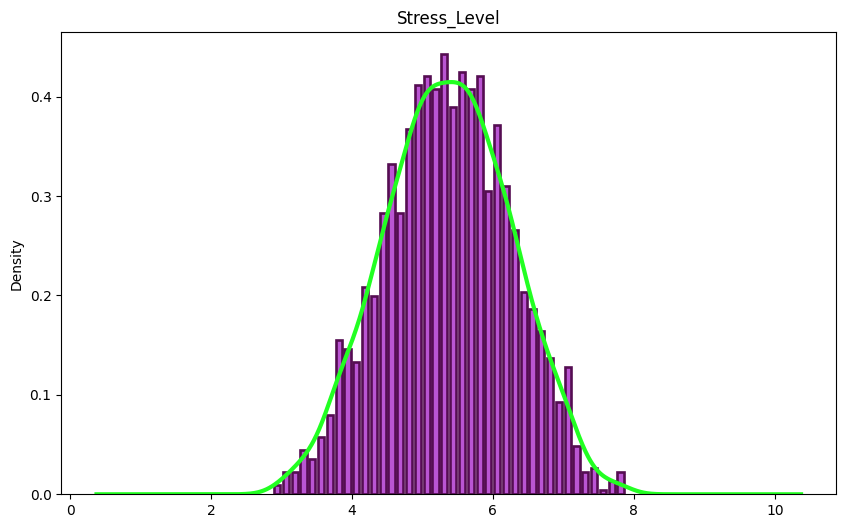

In [133]:
display(Markdown("### Distribusi Normal"))
test_distribution(data_column_numeric[2])

### Distribusi Normal

Nilai p-Value: 1.3310740963024993e-06

Nilai skewness: 0.15440561163696936
Nilai kurt: -0.4089183971310484
Kolom Exercise_Hours_Per_Week tidak terdistribusi normal, uniform, maupun poisson


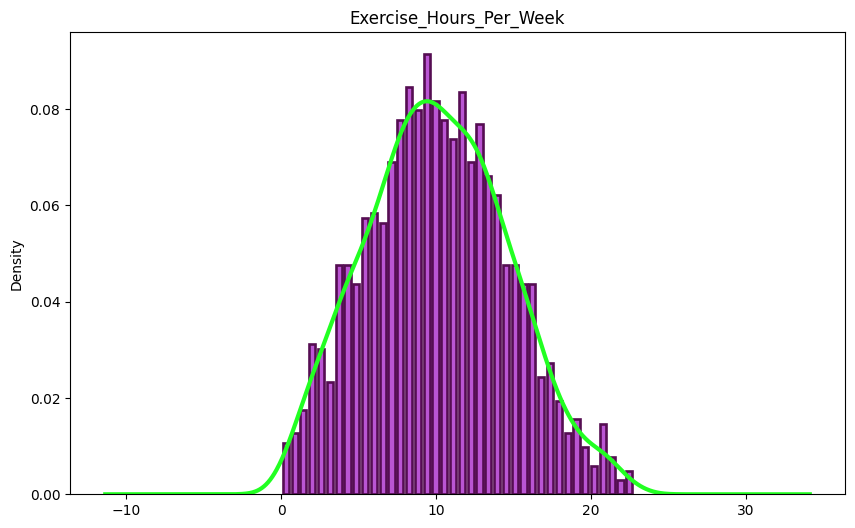

In [135]:
display(Markdown("### Distribusi Normal"))
test_distribution(data_column_numeric[3])

#### Jenis distribusi tidak dapat ditentukan

Nilai p-Value: 0.011693124328926103

Nilai skewness: -0.0125689095213034
Nilai kurt: -0.29519698928286564
Kolom Cholesterol_Level tidak terdistribusi normal, uniform, maupun poisson


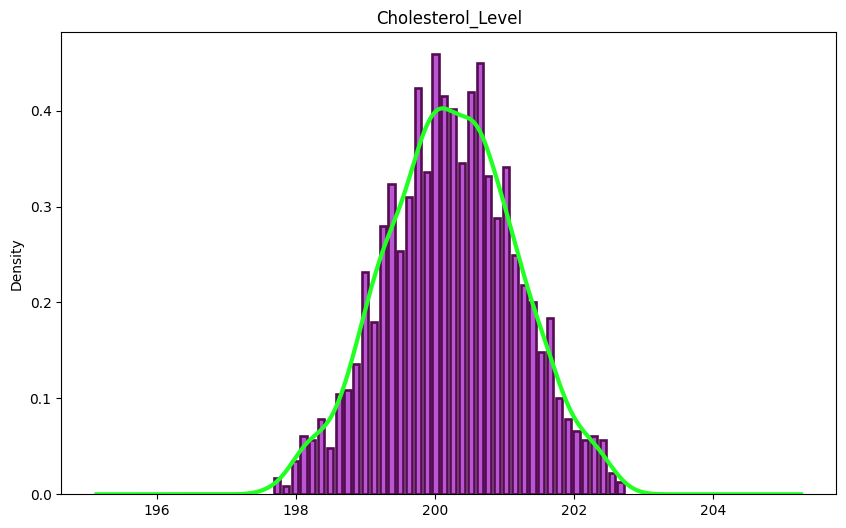

In [136]:
display(Markdown("#### Jenis distribusi tidak dapat ditentukan"))
test_distribution(data_column_numeric[4])

#### Jenis distribusi tidak dapat ditentukan

Nilai p-Value: 0.0006002445125838682

Nilai skewness: -0.07627163487078448
Nilai kurt: -0.3463605677877233
Kolom Weight tidak terdistribusi normal, uniform, maupun poisson


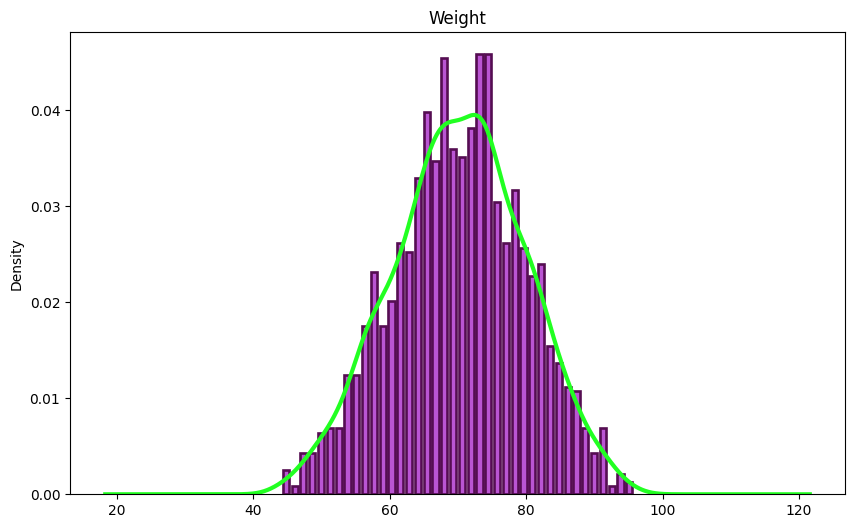

In [137]:
display(Markdown("#### Jenis distribusi tidak dapat ditentukan"))
test_distribution(data_column_numeric[5])

Nilai p-Value: 2.7837100528376526e-20

Nilai skewness: 0.23682074332132466
Nilai kurt: -0.9835805192649754


#### Kolom Height tidak terdistribusi normal, uniform, maupun poisson

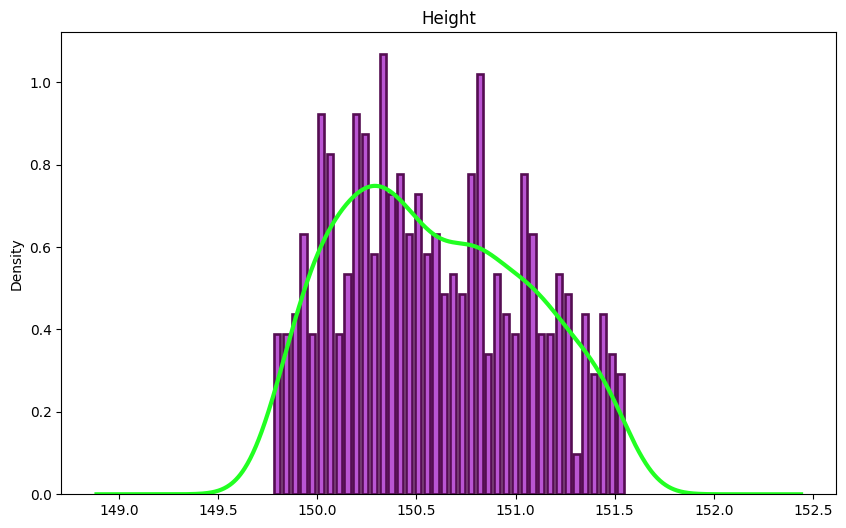

In [28]:
test_distribution(data_column_numeric[6])

### Distribusi Normal

Nilai p-Value: 0.0011089078469810583

Nilai skewness: -0.035395202936386795
Nilai kurt: -0.3479768102919456
Kolom Blood_Pressure tidak terdistribusi normal, uniform, maupun poisson


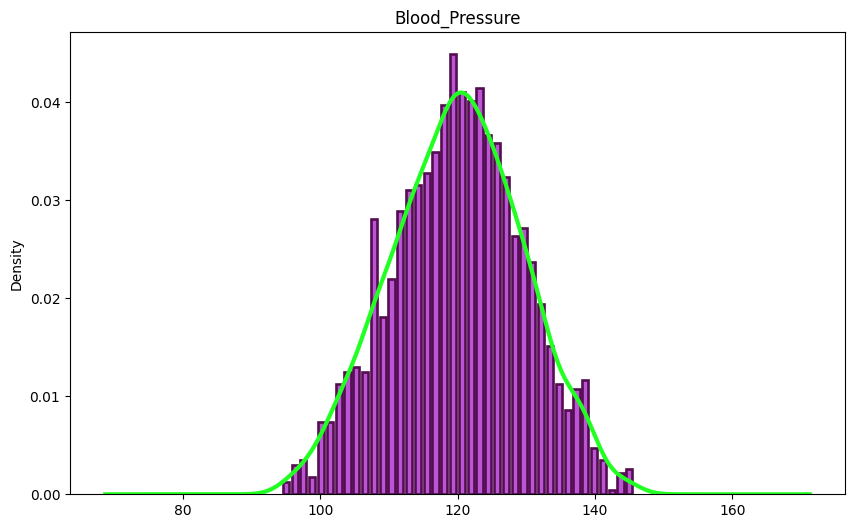

In [139]:
display(Markdown("### Distribusi Normal"))
test_distribution(data_column_numeric[7])

In [30]:
test_distribution(data_column_string[0])

#### Kolom Gender Memiliki Tipe Data String

#### Sehingga tidak berdistribusi

In [31]:
test_distribution(data_column_string[1])

#### Kolom Education Memiliki Tipe Data String

#### Sehingga tidak berdistribusi

In [32]:
test_distribution(data_column_string[2])

#### Kolom Health_Status Memiliki Tipe Data String

#### Sehingga tidak berdistribusi

# Soal khusus dataset

Mira adalah seorang peneliti kesehatan yang bekerja di sebuah lembaga riset medis
yang terkemuka. Sebagai bagian dari tugasnya, Mira memiliki akses ke sebuah dataset yang
berisi informasi tentang profil kesehatan dan gaya hidup dari sejumlah individu. Mira
bertanggung jawab untuk melakukan analisis statistika terhadap dataset ini guna mendapatkan
pemahaman yang lebih baik tentang faktor-faktor yang mempengaruhi kesehatan dan kualitas
hidup individu. Selain itu, Mira juga diminta untuk mengidentifikasi pola dan hubungan yang
signifikan antara variabel-variabel tersebut, serta untuk menjawab berbagai pertanyaan
penelitian yang diajukan oleh lembaga riset.


Atribut: Age, Income, Gender, Education, Stress_Level, Exercise_Hours_Per_Week,
Cholesterol_Level, Weight,Height, Blood_Pressure, Health_Status


Gunakan alpha = 0.05

## Nomor 5: Hipotesis 1 sampel

- Lembaga riset saat ini sedang mempertanyakan data berat badan individu yang
disimpan untuk kepentingan riset lanjutan. Identifikasilah apakah rata-rata berat badan
pasien diatas 65 kg?
- Tekanan darah sistole yang normal berada pada rentang 120 mmHg. Lembaga riset
perlu untuk memastikan apakah data individu yang diukur cukup normal. Periksalah
apakah rata-rata tekanan darah sistole bernilai 120 mmHg?
- Periksalah apakah data 200 individu pertama pengujian (baris teratas) memiliki rata-rata
waktu olahraga per minggu tidak sama dengan 15 jam?
- Apakah penduduk dengan pendapatan yang lebih besar dari Rp 7.500.000,00 tidak
sama dengan 30% dari data keseluruhan individu?

### Inisialisasi Fungsi Single Value

In [49]:
# Definisi uji dengan t-test
# t-test digunakan saat tabel berdistribusi normal dan hanya diketahui standar deviasi dari populasi (bukan sampel)
def calculateT(xbar: float, mu: float, n: int, deviation: float) -> float:
    """
    Menghitung nilai-t dari data
    Parameters
    ----------
        xbar: mean of sample with size n
        mu: real mean of population
        n: size of the sample
        deviation: population standard deviation
    Return:
        t-value of data with population size n and xbar
    """    
    return (xbar - mu) / (deviation / math.sqrt(n))


def findTValue(value: float, freedomDegree: int) -> float:
    """
    Given the P-value, find the T-value
    """
    return stats.t.ppf(value, freedomDegree)

def findZValue(value: float) -> float:
    """
    Given the P-value, find the Z-value
    """
    return stats.norm.ppf(value)

def calculatePValueZLeft(zValue: float) -> float:
    """
    Given Z-Value, calculate the P-value to the left
    """
    return stats.norm.cdf(zValue)

def calculatePValueZRight(zValue: float) -> float:
    """
    Given z-value, calculate P-value to the right
    """
    return stats.norm.sf(zValue)

def calculatePValueTLeft(tValue: float, freedomDegree: int) -> float:
    """
    Given T-value, calculate the P-value to the left

    Args:
        tValue (float): T-value
        freedomDegree (int): degrees of freedom (length - 1)
    """
    return stats.t.cdf(abs(tValue), freedomDegree)

def calculatePValueTRight(tValue: float, freedomDegree: int) -> float:
    return stats.t.sf(tValue, freedomDegree)

### 1
Lembaga riset saat ini sedang mempertanyakan data berat badan individu yang
disimpan untuk kepentingan riset lanjutan. Identifikasilah apakah rata-rata berat badan
pasien diatas 65 kg?

In [50]:
# Inisialisasi data berat badan
weight_data = result_data[data_column_numeric[5]]

# 1. Definisi hipotesis 0 H0 saat rata-rata = 65, menjadi nilai Mu
mu = 65
n = len(weight_data)
display(Markdown("#### 1. Definisi Hipotesis 0"))
display(Markdown(f"Hipotesis 0 (H0) saat rata-rata (μ) = {mu}"))

# 2. Definisi hipotesis alternatif H1 saat rata-rata > 65
display(Markdown("#### 2. Definisi Hipotesis 1"))
display(Markdown(f"Hipotesis 1 (H1) saat rata-rata (μ) > {mu}"))

# 3. Tingkat signifikan α yang digunakan adalah 0.05.
alpha = 0.05
display(Markdown("#### 3. Tingkat Signifikan α"))
display(Markdown(f"Digunakan tingkat signifikan α = {alpha}"))

# 4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
# Tes uji statistik yang digunakan adalah menggunakan t-test, karena yang digunakan adalah upper one tailed test, maka gunakan 1-alpha
t_critical = findTValue(1 - alpha, len(weight_data) - 1)
display(Markdown("#### 4. Penentuan Uji Statistik dan Daerah Kritis"))
display(Markdown("Uji statistik yang digunakan adalah 1-tailed t-test karena nilai σ tidak terdefinisi"))
display(Markdown(f"Critical region untuk α > 0.05 berada di nilai t > {t_critical}"))


# 5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
# Jika berdasarkan uji tes nilai peluang masuk ke daerah kritis, maka tolak H0, jika tidak terima H0
# 
t_value = calculateT(np.mean(weight_data), mu, len(weight_data), np.std(weight_data))
p_value = calculatePValueTRight(t_value, n-1)
display(Markdown("#### 5. Uji Statistik"))
display(Markdown(f"Didapatkan nilai t = {t_value}"))
display(Markdown(f"Nilai P untuk t = {t_value} = {p_value}"))


"""
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes
signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang
diinginkan
"""
display(Markdown("#### 6. Pengambilan Keputusan"))
if t_value > t_critical:
    display(Markdown(f"Tolak H0: rata-rata berat badan pasien lebih dari 65 kg ({np.mean(weight_data)}), dengan pengujian tes didapatkan t_critical > t_value = {t_value} > {t_critical}"))
else:
    display(Markdown(f"Gagal tolak H0: rata-rata berat badan pasien tidak lebih dari 65 kg"))

if p_value > alpha:
    display(Markdown(f"Tolak keputusan untuk menolak H0"))
else:
    display(Markdown(f"Dukung keputusan untuk menolak H0 karena {p_value} < {0.05}, sehingga rata-rata berat badan adalah benar di atas {mu}"))

# Perbandingan dengan fungsi bawaan
builtin_t, builtin_p = stats.ttest_1samp(weight_data, mu)
display(Markdown(f"Dengan menggunakan fungsi bawaan, didapatkan t-value = {builtin_t} dan p-value = {builtin_p}"))

#### 1. Definisi Hipotesis 0

Hipotesis 0 (H0) saat rata-rata (μ) = 65

#### 2. Definisi Hipotesis 1

Hipotesis 1 (H1) saat rata-rata (μ) > 65

#### 3. Tingkat Signifikan α

Digunakan tingkat signifikan α = 0.05

#### 4. Penentuan Uji Statistik dan Daerah Kritis

Uji statistik yang digunakan adalah 1-tailed t-test karena nilai σ tidak terdefinisi

Critical region untuk α > 0.05 berada di nilai t > 1.645690831425319

#### 5. Uji Statistik

Didapatkan nilai t = 22.558561651964325

Nilai P untuk t = 22.558561651964325 = 7.140546130005205e-100

#### 6. Pengambilan Keputusan

Tolak H0: rata-rata berat badan pasien lebih dari 65 kg (70.14635405301912), dengan pengujian tes didapatkan t_critical > t_value = 22.558561651964325 > 1.645690831425319

Dukung keputusan untuk menolak H0 karena 7.140546130005205e-100 < 0.05, sehingga rata-rata berat badan adalah benar di atas 65

Dengan menggunakan fungsi bawaan, didapatkan t-value = 22.55237019812136 dan p-value = 1.593161239989148e-99

### 2
Tekanan darah sistole yang normal berada pada rentang 120 mmHg. Lembaga riset
perlu untuk memastikan apakah data individu yang diukur cukup normal. Periksalah
apakah rata-rata tekanan darah sistole bernilai 120 mmHg?

In [83]:
# H0 : mu = 120
# H1 : mu != 120
sistole = result_data[data_column_numeric[7]]

# 1. Definisi hipotesis 0
mu = 120
display(Markdown("#### 1. Definisi Hipotesis 0"))
display(Markdown(f"Hipotesis 0 (H0) saat rata-rata (μ) = {mu}"))

# 2. Definisi hipotesis 1
xbar = np.mean(sistole)
deviation = np.std(sistole)
n = len(sistole)
display(Markdown("#### 2. Definisi Hipotesis 1"))
display(Markdown(f"Hipotesis 1 (H1) saat rata-rata (μ) ≠ {mu}"))

# 3. Tingkat signifikansi
alpha = 0.05
display(Markdown("#### 3. Tingkat Signifikan α"))
display(Markdown(f"Digunakan tingkat signifikan α = {alpha}"))

# 4. Penentuan jenis tes
t_critical_up = findTValue(1 - alpha / 2, n - 1)
t_critical_down = findTValue(alpha / 2, n - 1)
display(Markdown("#### 4. Penentuan Uji Statistik dan Daerah Kritis"))
display(Markdown("Uji statistik yang digunakan adalah 2-tailed t-test karena nilai σ tidak terdefinisi"))
display(Markdown(f"Critical region untuk α > 0.05 berada di nilai t > {t_critical_up} atau t < {t_critical_down}"))
display(Markdown(f"Didapat nilai rata-rata data: {xbar}, s: {deviation}, panjang data: {n}"))

# 5. Uji statistik
t_value = calculateT(xbar, mu, n, deviation)
p_value = 2 * calculatePValueTRight(abs(t_value), n - 1)
display(Markdown("#### 5. Uji Statistik"))
display(Markdown(f"Didapat nilai t = {t_value}"))
display(Markdown(f"Nilai P = {p_value}"))


# 6. Pengambilan keputusan
display(Markdown("#### 6. Pengambilan Keputusan"))
if t_value < (t_critical_down) or t_value > t_critical_up or p_value < 0.05:
    display(Markdown("Tolak H0"))
else:
    display(Markdown(f"Gagal tolak H0: nilai t berada di antara {t_critical_down} < {t_value} < {t_critical_up} dan p-value = {p_value} >= {alpha} sehingga rata-rata sistole berada di rentang {mu} mmHg, yaitu {xbar}"))

# 7. Perbandingan dengan Fungsi Bawaan
builtin_t, builtin_p = stats.ttest_1samp(sistole, mu)
display(Markdown(f"Nilai fungsi bawaan: t = {builtin_t} dan p = {builtin_p}"))

#### 1. Definisi Hipotesis 0

Hipotesis 0 (H0) saat rata-rata (μ) = 120

#### 2. Definisi Hipotesis 1

Hipotesis 1 (H1) saat rata-rata (μ) ≠ 120

#### 3. Tingkat Signifikan α

Digunakan tingkat signifikan α = 0.05

#### 4. Penentuan Uji Statistik dan Daerah Kritis

Uji statistik yang digunakan adalah 2-tailed t-test karena nilai σ tidak terdefinisi

Critical region untuk α > 0.05 berada di nilai t > 1.961277672417048 atau t < -1.9612776724170484

Didapat nilai rata-rata data: 119.97252638083732, s: 9.563375289968194, panjang data: 1808

#### 5. Uji Statistik

Didapat nilai t = -0.12215292983813077

Nilai P = 0.9027914864988645

#### 6. Pengambilan Keputusan

Gagal tolak H0: nilai t berada di antara -1.9612776724170484 < -0.12215292983813077 < 1.961277672417048 dan p-value = 0.9027914864988645 >= 0.05 sehingga rata-rata sistole berada di rentang 120 mmHg, yaitu 119.97252638083732

Nilai fungsi bawaan: t = -0.12211914393516447 dan p = 0.9028182396224849

### 3
Periksalah apakah data 200 individu pertama pengujian (baris teratas) memiliki rata-rata
waktu olahraga per minggu tidak sama dengan 15 jam?

In [85]:
n = 200
sport_200 = result_data[numeric_columns[3]].head(n)
mu = 15
xbar = np.mean(sport_200)
deviation = np.std(sport_200)
# 1. H0 : mu = 15
display(Markdown("#### 1. Definisi Hipotesis 0"))
display(Markdown(f"Hipotesis 0 (H0) saat rata-rata (μ) = {mu}"))

# 2. H1 : mu != 15
display(Markdown("#### 2. Definisi Hipotesis 1"))
display(Markdown(f"Hipotesis 1 (H1) saat rata-rata (μ) ≠ {mu}"))

# 3. Signifikansi
alpha = 0.05
display(Markdown("#### 3. Tingkat Signifikan α"))
display(Markdown(f"Digunakan tingkat signifikan α = {alpha}"))

# 4. Penentuan Pengujian
t_critical_up = findTValue(1 - alpha / 2, n - 1)
t_critical_down = findTValue(alpha / 2, n - 1)
t_value = calculateT(xbar, mu, n, deviation)
display(Markdown("#### 4. Penentuan Uji Statistik dan Daerah Kritis"))
display(Markdown("Uji statistik yang digunakan adalah 2-tailed t-test karena tidak ada standar deviasi sampel"))
display(Markdown(f"Critical region untuk α > 0.05 berada di nilai t > {t_critical_up} atau t < {t_critical_down}"))
display(Markdown(f"Didapat nilai rata-rata data: {xbar}, s: {deviation}, panjang data: {n}"))

# 5. Uji statistik
p_value = 2 * calculatePValueTRight(abs(t_value), n - 1)
display(Markdown("#### 5. Uji Statistik"))
display(Markdown(f"Didapat nilai t = {t_value}"))
display(Markdown(f"Nilai P = {p_value}"))
builtin_t, builtin_p = stats.ttest_1samp(sport_200, mu)

# 6. Pengambilan Keputusan
display(Markdown("#### 6. Ambil Keputusan: Tolak H0"))
if t_value < t_critical_down or t_value > t_critical_up or p_value < alpha:
    display(Markdown(f"Tolak H0 karena {p_value} < {alpha}: Rata-rata tiap orang tidak berolahraga per minggu selama 15 jam ({xbar} jam), dengan nilai t < critical = {t_value} < {t_critical_down}"))
else:
    display(Markdown("Gagal tolak H0: Rata-rata tiap orang berolahraga per minggu selama 15 jam"))

display(Markdown(f"Nilai fungsi bawaan: t = {builtin_t} dan p = {builtin_p}"))


#### 1. Definisi Hipotesis 0

Hipotesis 0 (H0) saat rata-rata (μ) = 15

#### 2. Definisi Hipotesis 1

Hipotesis 1 (H1) saat rata-rata (μ) ≠ 15

#### 3. Tingkat Signifikan α

Digunakan tingkat signifikan α = 0.05

#### 4. Penentuan Uji Statistik dan Daerah Kritis

Uji statistik yang digunakan adalah 2-tailed t-test karena tidak ada standar deviasi sampel

Critical region untuk α > 0.05 berada di nilai t > 1.971956544249395 atau t < -1.9719565442493954

Didapat nilai rata-rata data: 9.89650121860591, s: 4.480628293416782, panjang data: 200

#### 5. Uji Statistik

Didapat nilai t = -16.10809181115603

Nilai P = 6.446492536657828e-38

#### 6. Ambil Keputusan: Tolak H0

Tolak H0 karena 6.446492536657828e-38 < 0.05: Rata-rata tiap orang tidak berolahraga per minggu selama 15 jam (9.89650121860591 jam), dengan nilai t < critical = -16.10809181115603 < -1.9719565442493954

Nilai fungsi bawaan: t = -16.067771117602117 dan p = 8.555420977211684e-38

### 4
Apakah penduduk dengan pendapatan yang lebih besar dari Rp 7.500.000,00 tidak
sama dengan 30% dari data keseluruhan individu?

In [109]:
# H0 : p = 0.3
# H1 : p != 0.3

# 1. Definisi H0
p0 = 0.3
display(Markdown("#### 1. Definisi Hipotesis 0"))
display(Markdown(f"Hipotesis 0 (H0) saat proporsi p = {p0}"))

# Inisialisasi data
n = len(result_data[numeric_columns[1]])
income_7500 = result_data[result_data[numeric_columns[1]] > 7500000]

# 2. Definisi H1
display(Markdown("#### 2. Definisi Hipotesis 1"))
display(Markdown(f"Hipotesis 1 (H1) saat proporsi p ≠ {p0}"))

# 3. Definisi siginifikansi
display(Markdown("#### 3. Definisi Signifikansi"))
display(Markdown(f"Digunakan tingkat signifikan α = {alpha}"))

# 4. Penentuan Pengujian
z_critical_up = findZValue(1 - alpha / 2)
z_critical_down = findZValue(alpha / 2)
display(Markdown("#### 4. Penentuan Uji Statistik dan Daerah Kritis"))
display(Markdown("Uji statistik yang digunakan adalah 2-tailed z-test dengan menggunakan uji proporsi"))
display(Markdown(f"Critical region untuk α > 0.05 berada di nilai z > {z_critical_up} atau z < {z_critical_down}"))

# 5. Uji Statistik
p = len(income_7500) / n
z_value = (p - p0) / math.sqrt(p * (1 - p0) / math.sqrt(n))
p_value = 2 * calculatePValueZLeft(z_value)
display(Markdown("#### 5. Uji Statistik"))
display(Markdown(f"Didapat nilai z = {z_value}"))
display(Markdown(f"Didapat nilai p = {p_value}"))
builtin_t, builtin_p = statsmodels.stats.proportion.proportions_ztest(count=len(income_7500), nobs=n, value=0.3, alternative='two-sided')

# 6. Kesimpulan
display(Markdown("#### 6. Pengambilan Kesimpulan"))
if z_value < z_critical_down or z_value > z_critical_up:
    display(Markdown(f"H0 ditolak: nilai z < {z_critical_down} dan p = {p_value} < {alpha}, sehingga penduduk dengan pendapatan di atas 7.500.000 tidak sama dengan 30% populasi"))
else:
    display(Markdown("H0 gagal ditolak"))

display(Markdown(f"Nilai fungsi bawaan: z = {builtin_t} dan p = {builtin_p}"))

#### 1. Definisi Hipotesis 0

Hipotesis 0 (H0) saat proporsi p = 0.3

#### 2. Definisi Hipotesis 1

Hipotesis 1 (H1) saat proporsi p ≠ 0.3

#### 3. Definisi Signifikansi

Digunakan tingkat signifikan α = 0.05

#### 4. Penentuan Uji Statistik dan Daerah Kritis

Uji statistik yang digunakan adalah 2-tailed z-test dengan menggunakan uji proporsi

Critical region untuk α > 0.05 berada di nilai z > 1.959963984540054 atau z < -1.9599639845400545

#### 5. Uji Statistik

Didapat nilai z = -5.509588000969667

Didapat nilai p = 3.596745464070277e-08

#### 6. Pengambilan Kesimpulan

H0 ditolak: nilai z < -1.9599639845400545 dan p = 3.596745464070277e-08 < 0.05, sehingga penduduk dengan pendapatan di atas 7.500.000 tidak sama dengan 30% populasi

Nilai fungsi bawaan: z = -31.493444594448018 dan p = 1.0680798438027344e-217

## Nomor 6: Hipotesis 2 sampel

Lembaga riset membagi data individu menjadi dua bagian, yaitu data individu yang lebih
awal masuk data penelitian (bagian atas) dan yang baru saja (bagian bawah).

- Periksa apakah rata-rata berat badan individu yang lebih awal masuk data penelitian
sama dengan rata-rata berat badan individu yang masuk baru saja?
- Bagaimana dengan pendapatan individu, apakah pendapatan sistole individu yang lebih
awal masuk data penelitian lebih besar Rp 1.250.000,00 dari yang baru saja masuk?
- Lembaga riset ingin membandingkan kondisi kesehatan individu dari dua bagian data.
Apakah variansi tekanan darah individu yang lebih awal masuk data penelitian sama
dengan yang baru saja masuk?
- Apakah proporsi waktu olahraga yang lebih dari 8 jam per minggu pada data individu
awal lebih besar daripada kuantitas proporsi pada data individu akhir dengan waktu
olahraga yang sama?

### Inisialisasi Fungsi 2 Sampel

In [103]:
# Inisialisasi
n = len(result_data)

data_top = result_data.head(n // 2)
n_top = len(data_top)
data_bot = result_data.iloc[n // 2:]
n_bot = len(data_bot)

def calculateF(var1: float, var2: float) -> float:
    """
    Given two variances, find the F-value
    f = s1^2 / s2^2
    """
    return var1/var2

def findFValue(p_value: float, numerator_degree: int, denom_degree: int) -> float:
    """
    Find F-value, given P-value and degrees of freedom
    Args:
        p_value (float)
        numerator_degree (int)
        denom_degree (int)

    Returns:
        F-value
    """
    return stats.f.ppf(p_value, numerator_degree, denom_degree)

def calculatePValueF(f_value: float, numerator_degree: int, denom_degree: int) -> float:
    """Calculate P-value from given F-value

    Args:
        f_value (float): _description_
        numerator_degree (int): _description_
        denom_degree (int): _description_

    Returns:
        P-value
    """
    return stats.f.cdf(f_value, numerator_degree, denom_degree)

### 1
Periksa apakah rata-rata berat badan individu yang lebih awal masuk data penelitian
sama dengan rata-rata berat badan individu yang masuk baru saja?

In [110]:
# mu1 - mu2 = d0, d0 = 0
mu1 = np.mean(data_top[numeric_columns[5]])
mu2 = np.mean(data_bot[numeric_columns[5]])

# 1. Definisi hipotesis 0
# H0 : mu1 - mu2 = d0
display(Markdown("#### 1. Definisi Hipotesis 0"))
display(Markdown(f"Hipotesis 0 (H0) saat μ1 - μ2 = d0, dengan d0 = 0"))

# 2. Definisi hipotesis 1
# H1 : mu1 - mu2 != d0
display(Markdown("#### 2. Definisi Hipotesis 1"))
display(Markdown(f"Hipotesis 0 (H0) saat μ1 - μ2 ≠ d0, dengan d0 = 0"))

# 3. Signifikansi
alpha = 0.05
display(Markdown("#### 3. Tingkat Signifikan α"))
display(Markdown(f"Digunakan tingkat signifikan α = {alpha}"))
z_critical_down = findZValue(alpha / 2)
z_critical_up = findZValue(1 - alpha / 2)
display(Markdown(f"Daerah kritis: z < {z_critical_down} dan z > {z_critical_up}"))

# 4. Penentuan Pengujian
n1 = len(data_top[numeric_columns[5]])
n2 = len(data_bot[numeric_columns[5]])
std1 = np.std(data_top[numeric_columns[5]])
std2 = np.std(data_bot[numeric_columns[5]])
display(Markdown("#### 4. Penentuan Uji Statistik dan Daerah Kritis"))
display(Markdown(f"Pengujian menggunakan 2-tailed z-test untuk 2 sampel karena standar deviasi ditemukan"))

# 5. Uji Statistik
display(Markdown("#### 5. Uji Statistik"))
d = {'Top': pd.Series([mu1, std1, n1], index=['μ', 'σ', 'n']),
     'Bot': pd.Series([mu2, std2, n2], index=['μ', 'σ', 'n'])}
print(pd.DataFrame(d))
z_value = (mu1 - mu2 - 0) / math.sqrt((std1 * std1 / n1) + (std2 * std2 / n2))
display(Markdown(f"Didapat nilai z = {z_value}"))
p_value = 2 * calculatePValueZLeft(z_value)
builtin_z, builtin_p = statsmodels.stats.weightstats.ztest(data_top[numeric_columns[5]], data_bot[numeric_columns[5]], value=0)

# 6. Pengambilan Keputusan
display(Markdown("#### 6. Pengambilan Keputusan"))
if z_value < z_critical_down or z_value > z_critical_up or p_value < alpha:
    print("Tolak H0")
else:
    display(Markdown(f"Gagal tolak H0: Nilai z tidak masuk critical value ({z_critical_down} < {z_value} < {z_critical_up})\nsehingga rata-rata awal dekat dengan rata-rata akhir, dan p = {p_value} >= {alpha}"))

display(Markdown(f"Fungsi bawaan: z = {builtin_z} dan p = {builtin_p}"))

#### 1. Definisi Hipotesis 0

Hipotesis 0 (H0) saat μ1 - μ2 = d0, dengan d0 = 0

#### 2. Definisi Hipotesis 1

Hipotesis 0 (H0) saat μ1 - μ2 ≠ d0, dengan d0 = 0

#### 3. Tingkat Signifikan α

Digunakan tingkat signifikan α = 0.05

Daerah kritis: z < -1.9599639845400545 dan z > 1.959963984540054

#### 4. Penentuan Uji Statistik dan Daerah Kritis

Pengujian menggunakan 2-tailed z-test untuk 2 sampel karena standar deviasi ditemukan

#### 5. Uji Statistik

          Top         Bot
μ   70.310902   69.975016
σ    9.482857    9.827453
n  904.000000  904.000000


Didapat nilai z = 0.7394909741584427

#### 6. Pengambilan Keputusan

Gagal tolak H0: Nilai z tidak masuk critical value (-1.9599639845400545 < 0.7394909741584427 < 1.959963984540054)
sehingga rata-rata awal dekat dengan rata-rata akhir, dan p = 1.5403910815338073 >= 0.05

Fungsi bawaan: z = 0.7390818504899718 dan p = 0.4598572969985659

### 2
Bagaimana dengan pendapatan individu, apakah pendapatan individu yang lebih
awal masuk data penelitian lebih besar Rp 1.250.000,00 dari yang baru saja masuk?

In [114]:
# mu1 - mu2 = d0, d0 = 1250000
# H0 : mu1 - mu2 = d0
# H1 : mu1 - mu2 ≠ d0

# 1. Penentuan hipotesis 0
d0 = 1250000
display(Markdown("#### 1. Definisi Hipotesis 0"))
display(Markdown(f"H0 saat μ1 - μ2 = d0, dengan d0 = {d0}"))

# 2. Definisi hipotesis 1
# H1 : mu1 - mu2 != d0
display(Markdown("#### 2. Definisi Hipotesis 1"))
display(Markdown(f"Hipotesis 0 (H0) saat μ1 - μ2 ≠ d0, dengan d0 = {d0}"))

# 3. Signifikansi
alpha = 0.05
display(Markdown("#### 3. Tingkat Signifikan α"))
display(Markdown(f"Digunakan tingkat signifikan α = {alpha}"))

# 4. Penentuan Pengujian
mu1 = np.mean(data_top[numeric_columns[1]])
mu2 = np.mean(data_bot[numeric_columns[1]])
std1 = np.std(data_top[numeric_columns[1]])
std2 = np.std(data_bot[numeric_columns[1]])
n1 = len(data_top[numeric_columns[1]])
n2 = len(data_bot[numeric_columns[1]])
display(Markdown("#### 4. Penentuan Uji Statistik dan Daerah Kritis"))
display(Markdown(f"Pengujian menggunakan 2-tailed z-test untuk 2 sampel karena standar deviasi ditemukan"))
z_critical_down = findZValue(alpha / 2)
z_critical_up = findZValue(1 - alpha / 2)

# 5. Uji Statistik
display(Markdown("#### 5. Pengambilan Keputusan"))
d = {'Top': pd.Series([mu1, std1, n1], index=['μ', 'σ', 'n']),
     'Bot': pd.Series([mu2, std2, n2], index=['μ', 'σ', 'n'])}
print(pd.DataFrame(d))
z_value = (mu1 - mu2 - d0) / math.sqrt((std1 * std1 / n1) + (std2 * std2 / n2))
display(Markdown(f"Didapatkan nilai z = {z_value}"))
p_value = calculatePValueZLeft(z_value) * 2
display(Markdown(f"Nilai p-value = {p_value}"))
builtin_z, builtin_p = statsmodels.stats.weightstats.ztest(data_top[numeric_columns[1]], data_bot[numeric_columns[1]], value=0)

# 6. Pengambilan Keputusan
display(Markdown("#### 6. Pengambilan Keputusan"))
if z_value > z_critical_up or z_value < z_critical_down or p_value < alpha:
    display(Markdown(f"Tolak H0: Nilai z = {z_value} < {z_critical_down}, sehingga pendapatan individu yang lebih awal ({mu1}) tidak lebih besar dari 1.250.000 dibandingkan individu data bawah ({mu2}), dibuktikan dengan p-value = {p_value} < {alpha}"))
else:
    print("Gagal tolak H0")

display(Markdown(f"Fungsi bawaan: z-value = {builtin_z} dan p-value = {builtin_p}"))

#### 1. Definisi Hipotesis 0

H0 saat μ1 - μ2 = d0, dengan d0 = 1250000

#### 2. Definisi Hipotesis 1

Hipotesis 0 (H0) saat μ1 - μ2 ≠ d0, dengan d0 = 1250000

#### 3. Tingkat Signifikan α

Digunakan tingkat signifikan α = 0.05

#### 4. Penentuan Uji Statistik dan Daerah Kritis

Pengujian menggunakan 2-tailed z-test untuk 2 sampel karena standar deviasi ditemukan

#### 5. Pengambilan Keputusan

            Top           Bot
μ  4.915131e+06  4.883530e+06
σ  1.899752e+06  1.941253e+06
n  9.040000e+02  9.040000e+02


Didapatkan nilai z = -13.487096345072791

Nilai p-value = 1.8629406946427058e-41

#### 6. Pengambilan Keputusan

Tolak H0: Nilai z = -13.487096345072791 < -1.9599639845400545, sehingga pendapatan individu yang lebih awal (4915131.386391999) tidak lebih besar dari 1.250.000 dibandingkan individu data bawah (4883530.06123458), dibuktikan dengan p-value = 1.8629406946427058e-41 < 0.05

Fungsi bawaan: z-value = 0.349618170893403 dan p-value = 0.726625272163153

### 3
Lembaga riset ingin membandingkan kondisi kesehatan individu dari dua bagian data.
Apakah variansi tekanan darah individu yang lebih awal masuk data penelitian sama
dengan yang baru saja masuk?

In [119]:
# var1 - var2 = d0, d0 = 0

# 1. Definisi hipotesis 0
# H0 : var1 - var2 = 0
display(Markdown("#### 1. Definisi Hipotesis 0"))
display(Markdown(f"Hipotesis 0 (H0) saat Var1 - Var2 = d0, dengan d0 = 0"))
var1 = np.var(data_top[numeric_columns[7]])
var2 = np.var(data_bot[numeric_columns[7]])

# 2. Definisi hipotesis 1
# H1 : var1 - var2 != 0
display(Markdown("#### 2. Definisi Hipotesis 1"))
display(Markdown(f"Hipotesis 0 (H0) saat Var1 - Var2 ≠ d0, dengan d0 = 0"))

# 3. Definisi signifikansi
alpha = 0.05
display(Markdown("#### 3. Tingkat Signifikan α"))
display(Markdown(f"Digunakan tingkat signifikan α = {alpha}"))

# 4. Penentuan pengujian
# Digunakan f-distribution test
display(Markdown("#### 4. Penentuan Pengujian"))
display(Markdown("Digunakan pengujian dengan f-distribution test karena membandingkan varians dengan varians lainnya"))
f_critical_low = findFValue(alpha / 2, n_top - 1, n_bot - 1)
f_critical_top = findFValue(1 - alpha / 2, n_top - 1, n_bot - 1)
display(Markdown(f"Critical region: f < {f_critical_low} atau f > {f_critical_top}"))

# 5. Uji statistik
display(Markdown("#### 5. Pengujian Statistik"))
f = calculateF(float(var1), float(var2))
display(Markdown(f"Dengan varians atas = {var1} dan varians bawah = {var2}, didapatkan nilai f = {f}"))
p_value = calculatePValueF(f, len(data_top)-1, len(data_bot)-1)
display(Markdown(f"Nilai p-value = {p_value}"))
bart = stats.bartlett(data_top[numeric_columns[7]], data_bot[numeric_columns[7]])
builtin_t = bart.statistic
builtin_z = bart.pvalue

# 6. Pengambilan keputusan
display(Markdown("#### 6. Pengambilan Keputusan"))
if f < f_critical_low or f > f_critical_top or p_value < alpha:
    print("H0 ditolak")
else:
    display(Markdown(f"H0 gagal ditolak: karena nilai f ada pada range {f_critical_low} < {f} < {f_critical_top} dan p-value = {p_value} >= {alpha}, sehingga variansi tekanan darah antara data awal ({var1}) dan data akhir ({var2}) tidak jauh berbeda"))

display(Markdown(f"Nilai fungsi bawaan: z-value = {builtin_z} dan p-value = {builtin_z}"))

#### 1. Definisi Hipotesis 0

Hipotesis 0 (H0) saat Var1 - Var2 = d0, dengan d0 = 0

#### 2. Definisi Hipotesis 1

Hipotesis 0 (H0) saat Var1 - Var2 ≠ d0, dengan d0 = 0

#### 3. Tingkat Signifikan α

Digunakan tingkat signifikan α = 0.05

#### 4. Penentuan Pengujian

Digunakan pengujian dengan f-distribution test karena membandingkan varians dengan varians lainnya

Critical region: f < 0.8776306640433245 atau f > 1.1394314726799868

#### 5. Pengujian Statistik

Dengan varians atas = 95.71886657082865 dan varians bawah = 86.95422800122877, didapatkan nilai f = 1.1007960023459242

Nilai p-value = 0.9253806630437519

#### 6. Pengambilan Keputusan

H0 gagal ditolak: karena nilai f ada pada range 0.8776306640433245 < 1.1007960023459242 < 1.1394314726799868 dan p-value = 0.9253806630437519 >= 0.05, sehingga variansi tekanan darah antara data awal (95.71886657082865) dan data akhir (86.95422800122877) tidak jauh berbeda

Nilai fungsi bawaan: z-value = 0.14923866441068603 dan p-value = 0.14923866441068603

### 4
Apakah proporsi waktu olahraga yang lebih dari 8 jam per minggu pada data individu
awal lebih besar daripada kuantitas proporsi pada data individu akhir dengan waktu
olahraga yang sama?

In [128]:
# p1 - p2 = 8
# H1 : p1 - p2 != 0

# 1. Definisi hipotesis 0
# H0 : p1 - p2 = 0
display(Markdown("#### 1. Definisi Hipotesis 0"))
display(Markdown(f"H0 saat p1 - p2 = d0, dengan d0 = 0"))

# 2. Definisi hipotesis 1
display(Markdown("#### 2. Definisi Hipotesis 1"))
display(Markdown(f"Hipotesis 1 (H1) saat p1 - p2 ≠ 0"))

# 3. Definisi signifikansi
alpha = 0.05
display(Markdown("#### 3. Tingkat Signifikan α"))
display(Markdown(f"Digunakan tingkat signifikan α = {alpha}"))

# 4. Penentuan Pengujian
data_top_exercise = data_top[data_top[numeric_columns[3]] > 8]
data_bot_exercise = data_bot[data_bot[numeric_columns[3]] > 8]
display(Markdown("#### 4. Penentuan Pengujian dan Daerah Kritis"))
display(Markdown(f"Pengujian menggunakan tes proporsi untuk 2 sampel dengan menggunakan z-test"))
z_critical_up = findZValue(1 - alpha / 2)
z_critical_down = findZValue(alpha / 2)
display(Markdown(f"Daerah kritis: z < {z_critical_down} atau z > {z_critical_up}"))

# 5. Uji Statistik
display(Markdown("#### 5. Uji Statistik"))
n1 = len(data_top)
n2 = len(data_bot)
x1 = len(data_top_exercise)
x2 = len(data_bot_exercise)
p1 = x1 / n1
p2 = x2 / n2
d = {'Top': pd.Series([p1, x1, n1], index=['p', 'x', 'n']),
     'Bot': pd.Series([p2, x2, n2], index=['p', 'x', 'n'])}
print(pd.DataFrame(d))

p = (x1 + x2) / (n1 + n2)
z_value = (p1 - p2) / math.sqrt(p * (1 - p) * (1/n1 + 1/n2))
display(Markdown(f"Didapatkan z-value = {z_value}"))
p_value = calculatePValueZLeft(z_value)
display(Markdown(f"Didapatkan p-value = {p_value}"))
builtin_z, builtin_p = statsmodels.stats.proportion.proportions_ztest(count=[x1, x2], nobs=[n1, n2], alternative='two-sided')

# 6. Penentuan Keputusan
display(Markdown("#### 6. Pengambilan Keputusan"))
if z_value < z_critical_down or z_value > z_critical_up or p_value < alpha:
    display(Markdown(f"H0 ditolak "))
else:
    display(Markdown(f"H0 gagal ditolak: nilai z ada dalam range {z_critical_down} < {z_value} < {z_critical_up} dan p-value = {p_value} >= {alpha}, sehingga proporsi untuk yang olahraga lebih dari 8 jam per minggu antara data atas ({p1}) dengan data bawah ({p2}) cukup dekat")) 
display(Markdown(f"Fungsi builtin: p-value = {builtin_p} dan z-value = {builtin_z}"))


#### 1. Definisi Hipotesis 0

H0 saat p1 - p2 = d0, dengan d0 = 0

#### 2. Definisi Hipotesis 1

Hipotesis 1 (H1) saat p1 - p2 ≠ 0

#### 3. Tingkat Signifikan α

Digunakan tingkat signifikan α = 0.05

#### 4. Penentuan Pengujian dan Daerah Kritis

Pengujian menggunakan tes proporsi untuk 2 sampel dengan menggunakan z-test

Daerah kritis: z < -1.9599639845400545 atau z > 1.959963984540054

#### 5. Uji Statistik

          Top         Bot
p    0.673673    0.659292
x  609.000000  596.000000
n  904.000000  904.000000


Didapatkan z-value = 0.6484707415315133

Didapatkan p-value = 0.741659735612495

#### 6. Pengambilan Keputusan

H0 gagal ditolak: nilai z ada dalam range -1.9599639845400545 < 0.6484707415315133 < 1.959963984540054 dan p-value = 0.741659735612495 >= 0.05, sehingga proporsi untuk yang olahraga lebih dari 8 jam per minggu antara data atas (0.6736725663716814) dengan data bawah (0.6592920353982301) cukup dekat

Fungsi builtin: p-value = 0.51668052877501 dan z-value = 0.6484707415315133